# CSAT: E-Commerce Customer Satisfaction Score Prediction - Deep Learning (ANNs)
<h3 align="center">(by Aiman Sahay)</h3>

---

### Project Type - Deep Learning (ANNs) - EDA/Regression/Deep Learning/ANN

### Contribution - Individual - Aiman Sahay

---

## **PROJECT SUMMARY**

To be updated

---

## **GITHUB LINK**

Put the link here

---
## **PROJECT OBJECTIVE / PROBLEM STATEMENT**

The goal of this project is to **develop a Deep Learning–based Artificial Neural Network (ANN) model** that can **predict Customer Satisfaction (CSAT) scores** based on customer interaction data from the e-commerce platform Shopzilla.

Instead of relying solely on delayed survey responses, the intent is to estimate CSAT in real-time using features such as interaction details, timestamps, customer remarks, product categories, and agent-related attributes.

The model aims to forecast CSAT scores accurately and support organisations in:
- Identifying dissatisfied customers early,
- Improving service workflows, and
- Enhancing customer experience and retention.

This project therefore focuses on ***transforming CSAT measurement from a reactive process to a predictive mechanism*** by leveraging deep learning.

---
# ***Let's Begin !***

## **1. Know Your Data**

### Import Libraries

In [1]:
# Install Libararies
!pip install missingno

In [5]:
# Import libraries
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

### Load Dataset

In [3]:
df = pd.read_csv("C:/Users/aimee/OneDrive/Data Science MSc/AlmaBetter MSc Data Science/Capstone Projects/Spl_Mod_4_Intro_to_DL/eCommerce_Customer_support_data.csv")

### Dataset First View

In [4]:
df.head()

,Unique id,channel_name,category,Sub-category,Customer Remarks,Order_id,order_date_time,Issue_reported at,issue_responded,Survey_response_Date,Customer_City,Product_category,Item_price,connected_handling_time,Agent_name,Supervisor,Manager,Tenure Bucket,Agent Shift,CSAT Score
0,7e9ae164-6a8b-4521-a2d4-58f7c9fff13f,Outcall,Product Queries,Life Insurance,NaN,c27c9bb4-fa36-4140-9f1f-21009254ffdb,NaN,01/08/2023 11:13,01/08/2023 11:47,01-Aug-23,NaN,NaN,NaN,NaN,Richard Buchanan,Mason Gupta,Jennifer Nguyen,On Job Training,Morning,5
1,b07ec1b0-f376-43b6-86df-ec03da3b2e16,Outcall,Product Queries,Product Specific Information,NaN,d406b0c7-ce17-4654-b9de-f08d421254bd,NaN,01/08/2023 12:52,01/08/2023 12:54,01-Aug-23,NaN,NaN,NaN,NaN,Vicki Collins,Dylan Kim,Michael Lee,>90,Morning,5
2,200814dd-27c7-4149-ba2b-bd3af3092880,Inbound,Order Related,Installation/demo,NaN,c273368d-b961-44cb-beaf-62d6fd6c00d5,NaN,01/08/2023 20:16,01/08/2023 20:38,01-Aug-23,NaN,NaN,NaN,NaN,Duane Norman,Jackson Park,William Kim,On Job Training,Evening,5
3,eb0d3e53-c1ca-42d3-8486-e42c8d622135,Inbound,Returns,Reverse Pickup Enquiry,NaN,5aed0059-55a4-4ec6-bb54-97942092020a,NaN,01/08/2023 20:56,01/08/2023 21:16,01-Aug-23,NaN,NaN,NaN,NaN,Patrick Flores,Olivia Wang,John Smith,>90,Evening,5
4,ba903143-1e54-406c-b969-46c52f92e5df,Inbound,Cancellation,Not Needed,NaN,e8bed5a9-6933-4aff-9dc6-ccefd7dcde59,NaN,01/08/2023 10:30,01/08/2023 10:32,01-Aug-23,NaN,NaN,NaN,NaN,Christopher Sanchez,Austin Johnson,Michael Lee,0-30,Morning,5


### Dataset Rows & Columns count

In [6]:
print(f"Dataset Shape: {df.shape}")

Dataset Shape: (85907, 20)


### Dataset Information

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85907 entries, 0 to 85906
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unique id                85907 non-null  object 
 1   channel_name             85907 non-null  object 
 2   category                 85907 non-null  object 
 3   Sub-category             85907 non-null  object 
 4   Customer Remarks         28742 non-null  object 
 5   Order_id                 67675 non-null  object 
 6   order_date_time          17214 non-null  object 
 7   Issue_reported at        85907 non-null  object 
 8   issue_responded          85907 non-null  object 
 9   Survey_response_Date     85907 non-null  object 
 10  Customer_City            17079 non-null  object 
 11  Product_category         17196 non-null  object 
 12  Item_price               17206 non-null  float64
 13  connected_handling_time  242 non-null    float64
 14  Agent_name            

### Dataset Description

In [8]:
df.describe()

,Item_price,connected_handling_time,CSAT Score
count,17206.000000,242.000000,85907.000000
mean,5660.774846,462.400826,4.242157
std,12825.728411,246.295037,1.378903
min,0.000000,0.000000,1.000000
25%,392.000000,293.000000,4.000000
50%,979.000000,427.000000,5.000000
75%,2699.750000,592.250000,5.000000
max,164999.000000,1986.000000,5.000000


Since only 3 columns have a numerical data type, we get the statistical metrics only for these 3 columns at present. We'll analyze this further after data type conversion for other columns at a later stage.

### Duplicate Values

In [9]:
print(f" Duplicate values in the Dataset: {df.duplicated().sum()}")

 Duplicate values in the Dataset: 0


***There are no duplicate values in the dataset.***

### Missing Values

In [10]:
df.isnull().sum()

Unique id                      0
channel_name                   0
category                       0
Sub-category                   0
Customer Remarks           57165
Order_id                   18232
order_date_time            68693
Issue_reported at              0
issue_responded                0
Survey_response_Date           0
Customer_City              68828
Product_category           68711
Item_price                 68701
connected_handling_time    85665
Agent_name                     0
Supervisor                     0
Manager                        0
Tenure Bucket                  0
Agent Shift                    0
CSAT Score                     0
dtype: int64

***Missing Values Percentage***

In [13]:
# Function to calculate missing values percentage.
def missing_val_df(df):
    # Calculate the total number of missing values in each column
    missing_count = df.isnull().sum()
    
    # Calculate the percentage of missing values in each column
    missing_percent = (missing_count / len(df)) * 100
    
    # Create a DataFrame to display missing counts and percentages side by side
    missing_df = pd.DataFrame({
        'Missing Count': missing_count,
        'Missing Percentage': missing_percent.round(2)
    })
    
    # Return the missing_values df
    return missing_df

In [12]:
missing_val_df(df)

,Missing Count,Missing Percentage
Unique id,0,0.00
channel_name,0,0.00
category,0,0.00
Sub-category,0,0.00
Customer Remarks,57165,66.54
Order_id,18232,21.22
order_date_time,68693,79.96
Issue_reported at,0,0.00
issue_responded,0,0.00
Survey_response_Date,0,0.00


***Visualize Missing Values***

In [22]:
# Function to plot missing vs. valid values
def plot_missing_valid(df, title, ax):
    total_counts = len(df)
    missing_counts = df.isnull().sum()
    valid_counts = total_counts - missing_counts

    ax.bar(missing_counts.index, valid_counts, label='Valid', color='lightblue')
    ax.bar(missing_counts.index, missing_counts, bottom=valid_counts, label='Missing', color='pink')

    ax.set_title(title)
    ax.set_xlabel('Columns')
    ax.set_ylabel('Count')
    ax.tick_params(axis='x', rotation=90)
    ax.grid(axis='y')
    ax.legend()

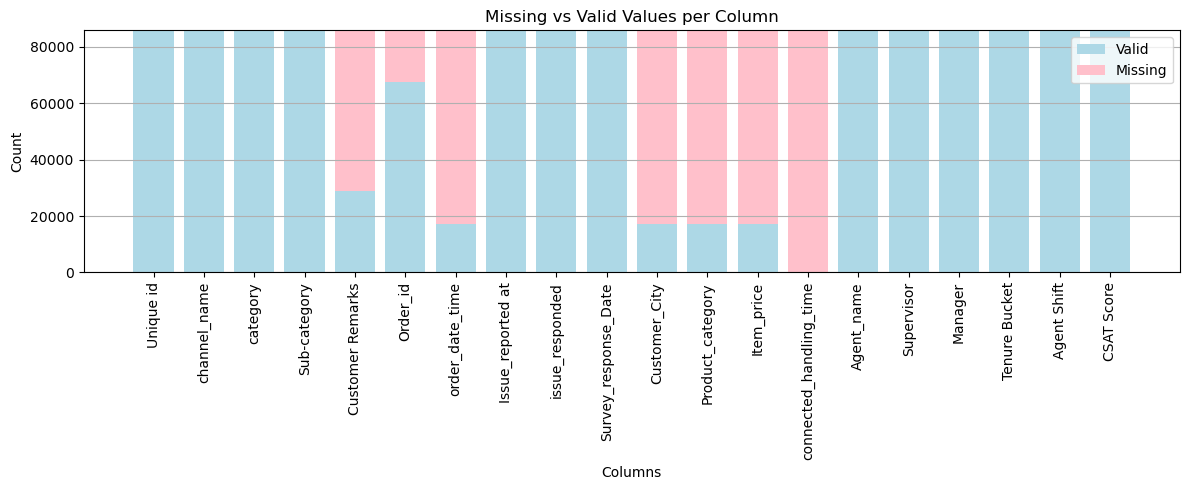

In [25]:
fig, ax = plt.subplots(figsize=(12, 5))

plot_missing_valid(df, 'Missing vs Valid Values per Column', ax)

plt.tight_layout()
plt.show()

**Missing Values Observation**

Substantial missing values have been found in the following columns.

| **Column** | **Missing %** | **Possible Interpretation / Reason** | 
|------------------|-------------|--------------------------------------|
|`Column Remarks`|66.54%|Many customers did not leave written feedback after the interaction.|
|`Order_id`|21.22%|Some service interactions may not have been linked to a specific order.|
|`order_date_time`, `Customer_City`, `Product_category`, `Item_price`|~80%|These attributes seem to be available only for order-related cases and missing for inquiry-related interactions.|
|`connected_handling_time`|99.72%|This field appears almost entirely unavailable and may not be useful for modeling.|

### Unique Values for each variable

In [26]:
df.nunique()

Unique id                  85907
channel_name                   3
category                      12
Sub-category                  57
Customer Remarks           18231
Order_id                   67675
order_date_time            13766
Issue_reported at          30923
issue_responded            30262
Survey_response_Date          31
Customer_City               1782
Product_category               9
Item_price                  2789
connected_handling_time      211
Agent_name                  1371
Supervisor                    40
Manager                        6
Tenure Bucket                  5
Agent Shift                    5
CSAT Score                     5
dtype: int64

---
## **2. Understanding Variables**

#### Variable Descriptions

- **Unique id:** Unique reference number for each record, ensuring traceability across the dataset.
- **channel_name:** The customer interaction channel (e.g., call, chat, email etc.) used to classify service touchpoints.
- **category:** High-level classification of customer concern (e.g., product, delivery, service etc.).
- **Sub-category:** Granular classification under category for deeper root-cause analysis.
- **Customer Remarks:** Free-text remarks from customers describing the issue/feedback in their own words.
- **Order_id:** Unique identifier of the order linked to the customer complaint/interaction.
- **order_date_time:** Timestamp of when the order was placed; essential for timeline and SLA analysis.
- **Issue_reported at:** Timestamp indicating when the issue was first raised by the customer.
- **issue_responded:** Timestamp indicating when the customer issue was responded to by the agent.
- **Survey_response_Date:** Timestamp when customer satisfaction feedback was recorded.
- **Customer_City:** Geographical location of the customer; useful for geo-segmented analysis.
- **Product_category:** Category of the ordered product; useful for product-wise complaint trends.
- **Item_price:** Price of the purchased item linked to the complaint.
- **connected_handling_time:** Time taken by the agent to resolve/handle the complaint.
- **Agent_name:** Name/identifier of the customer support agent.
- **Supervisor:** Supervisor assigned to the agent.
- **Manager:** Manager overseeing the support operations.
- **Tenure Bucket:** Tenure category of the agent; useful to check performance vs experience.
- **Agent Shift:** Shift/timing during which the agent was working during the interaction.
- **CSAT Score:** Customer satisfaction score provided post-resolution.

#### Initial Insights Summary

Dataset contains a *mix of categorical variables* (e.g., channel_name, category, Manager) and date-time variables (e.g., order_date_time, Issue_reported at).

**Missing values** are highly concentrated in Customer Remarks, Order_id, date-time variables, Customer_City, Product_category, Item_price, and handling_time.

**Handling approach:**
- Text variables: NA will be replaced with "Not Provided"
- Date variables: will be parsed to datetime; missing values retained as NaT or imputed using business rules if required.
- Numerical fields (Item_price, handling_time): imputation using median or model-based inference depending on distribution.

**Data type conversions** required for:
- order_date_time, Issue_reported at, issue_responded, Survey_response_Date: convert to datetime
- CSAT Score & Item_price: convert to numeric if detected as object.

---
## 3. **Data Wrangling**